# Deep Learning & Artificial Intelligence
## Recurrent Neural Networks and Natrural Language Processing
### Dr. Jie Tao, Fairfield University

## NLP Basics

- Text is one of the most widespread forms of **sequence** data.
  - It can be sequence of _characters_ or _words_
- The analysis of text data in general is called **Natural Language Processing** (NLP)
  - With potential applications such as text classification, sentiment analysis, question answering
- Deep Learning based NLP models recognize __patterns__ from words, sentences, or other linguistic units
  - Same as how we use CNN to recognize patterns from pixels in images

### How to Process Text

- Like all other NN models, raw text (e.g., in natural English) cannot be processed
  - We need to convert the words and sentencens into __real-valued tensors__
- There are multiple ways to do this:
  - Segment text to __words__, then tranform each word into a __vector__
  - Segment text to __characters__, then tranform each character into a __vector__
  - Extract $N$ consecutive words or characters together, and transform them into vectors. These $N$ consecutive words or characters are called __N-grams__, aka. bag-of-words.

- Generally, the different units into which you can break down text (e.g., words, characters, or n-grams) are called **tokens**
  - Specifically, __tokens__ refer to words or multi-word phrases only
  - This segmentation process is called __tokenization__
- Then we just need to associate rea;-valued vectors with the tokens - which is called **vectorization**. There are two ways of doing so:
  - Our old friend One-hot Encoding, or
  - Word Embedding

- That's how we transform text in natural language into tensors (e.g., `NumPy` arrays) so `keras` can take them

### Tokenization & Vectorization

![tokenization](https://drek4537l1klr.cloudfront.net/chollet/Figures/06fig01.jpg)

#### One-hot Encoding of Text

- OHE is the most basic and common way of vectorization
  - You can refer to L3, the IMDB data was OHE'ed
  - Every word has a unique index `i` in the vocabulary (contains all possible words in the text)
  - Each word is then converted into a binary vector
    - the vector has a size of $N$ - the size of the vocabulary
    - the vector has a value of `1` at the `i-th` position, rest are `0`s
- We can perform OHE on __words__ and __characters__
  - See example below for a word-level OHE
  - Refer to Listing 6.2 for a character-level OHE

In [ ]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

def ohe(samples, max_len = 10):
  '''
  INPUT:
  ---
  - samples (text): sequence of words/characters to be vectorized
  ---
  OUTPUT:
  ---
  - results (NumPy array): binary array, the appearing word is 1 rest are 0
  '''
  #### construct the vocabulary by adding all unique words to it
  #### each word is assigned with an ID: {word : ID}
  token_index = {}
  for sample in samples:
      for word in sample.split():
          if word not in token_index:
              #### the first word has an ID of 1, then 2, ...
              token_index[word] = len(token_index) + 1
  #### It's always a good practice to set a max_length
  #### since rare words are usually less important
  max_length = max_len
  #### creating holders for the results, which is a 3D tensor
  #### first dimension corresponds to how many samples are processed
  #### second dimension corresponds to the length of sample (<= max_length)
  #### third dimension correponds to the size of the vocabulary + 1
  #### TRICK: the reason we need to have `+1` is we need to
  #### capture words that are not in the vocabulary
  results = np.zeros(shape=(len(samples),
                            max_length,
                            max(token_index.values()) + 1))
  for i, sample in enumerate(samples):
      #### if words appear and within `max_length`
      for j, word in list(enumerate(sample.split()))[:max_length]:
          index = token_index.get(word)
          #### set it to 1
          results[i, j, index] = 1.
  return results

ohe(samples)

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

Looks like a complex function, right? Luckily `keras` provides a utility function for us. Refer to the official docs [here](https://keras.io/api/preprocessing/text/).

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# samples = ['The cat sat on the mat.', 'The dog ate my homework.']

#### tokenizer automatically filter out punctuations, and convert text to lower case
#### by default it splits text at word-level (on ' ')
#### you can specify `char_level=True` to make it work at char-level
#### you can also specify how you want to deal with out-of-vocabulary words
#### with `oov_token=`, e.g., `UNK` (means unknown)
tokenizer = Tokenizer(num_words=1000)
#### then you need to fit the tokenizer on the text
tokenizer.fit_on_texts(samples)
#### holding the word IDs
sequences = tokenizer.texts_to_sequences(samples)
#### start OHE
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
#### we can retrieve word indexes like below
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 9 unique tokens.


In [ ]:
#### We can check the OHE results
#### it is similar compared to our own `ohe` function
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

__PRO TIP:__ If your vocabulary is too big, you can consider the __hashing trick__. Refer to Listing 6.4 on the textbook for help. Because of recent processing power, we are less concerned about the vocabulary size.

#### Word Embeddings

- Another __more powerful__ way for vectorization is called __word embedding__, where words are represented using _dense_ real-valued vectors, rather than _binary_ vectors with OHE

| | OHE | Word Embedding |
| --- | --- | --- |
| values | binary | real-value (floats) |
| sparcity | sparse (mostly `0`s) | dense (much less `0`s) |
| dimensions | high | low |

- With OHE vectors are usually tens of thousands in dimension, we can specify the dimensionality of our word embedding vectors
  - although arbitrarily the magic number is `300`

![OHE vs. WE](https://drek4537l1klr.cloudfront.net/chollet/Figures/06fig02.jpg)

__PRO TIP__: Word Embeddings is the __preferred__ method.

#### How to Learn Word Embeddings

- The method is called __word2vec__, refer to [this post](http://jalammar.github.io/illustrated-word2vec/) for more information
- You can learn your word embeddings in one of the two following ways:
  - Learn word embeddings with your main NLP task (e.g., text classification, sentiment analysis)
    - Set up random values in word vectors, then learn these values as your learn the wrights in the NN
  - Load __pre-trained__ word embeddings and use them in your NLP task
    - it's simiar to using pre-trained models in the CV tasks
    - But in this case we are not using models but representations of the data (text)
- Let's talk about the two methods one-by-one.

#### Learning Word Embedding

- There is a specific Python package for word2vec called `gensim`
  - [here](https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial) is a good tutorial for word2vec
- Alternatively, we can use the `keras` `Embedding` layer for that
  - It is an easier way, but it is not as specialized for word2vec
  - In the `Embedding` layer, the word vectors are initialized with __random__ values
    - These random vectors are not meaningful since two interchangeable words may end up in totally different vectors
  - Thus, we need to __train__ these vectors, meaning learn the _actual, meaningful_ values in them
- In other words, vectors have geometric relationships (e.g., parallel, intersect)
  - So word vectors map human languages into a geometric space called __language space__
  - In a valid language space, synonyms should be embedded in similar vectors
  - And the words with different meanings should be more distance that words with similar meanings
- See example below (pet --> wild animal):

![word2vec ex](https://drek4537l1klr.cloudfront.net/chollet/Figures/06fig03.jpg)

- Note that all word embeddings are language specific, English word embeddings, Chinese word embeddings, ...

#### `keras` `Embedding` Layer

- The word embedding are not only language specific, but also task specific
  - since the same word may mean different things in different context
- Thus it is reasonable to train _different_ word embeddings for different tasks
  - so we use the `keras` `Embedding` Layer as follows:
```python
from keras.layers import Embedding
#### this layer let us to capture 1000 words in the vocabulary
#### and embed them in 64-length vectors
embedding_layer = Embedding(1000, 64)
```
- the `Embedding` layer maps word index (representing unique words) to real-valued vectors
  - so the word index are integers, and are 2D tensors (vocab_size, vector_size)
![emb_layer](https://drek4537l1klr.cloudfront.net/chollet/Figures/06fig04.jpg)


#### `keras` `Embedding` Layer

- The `keras` `Embedding` Layer takes 2D tensors of integers as input
  - with shape `(samples, sequence_length)`: `samples` are the number of text (e.g., sentences/paragraphs) in the collection (aka. corpus), and `sequence_length` is number of tokens in each sample.
  - In practice, each token is represented in word index (integers)
  - Theoretically, the `Embedding` Layer can take sequences of variant lengths
    - but all sequences in the __same batch__ needs to be of the same lenght
    - so in practice we usually set all sequences to be the same length
    - we use the utility function `pad_sequence` to pad shorter sequences and truncate longer ones (see [doc](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences) for help)

- The `keras` `Embedding` Layer returns 3D floating-point tensor of shape `(samples, sequence_length, embedding_dimensionality)`
  - Such a 3D tensor can then be processed by an **RNN** layer or a **1D convolution** layer
- When train the NN, the weights in the `Embedding` Layer are also trained via __backpropagation__
- After training, the embedding space will show a lot of structure—a kind of structure specialized for the specific problem for which you’re training your model.

- See below for an example with the IMDB data.


In [ ]:
#### import utilities
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
#### we take the most popular 10,000 words, and set length of each review at 20 words
max_features = 10000
maxlen = 20
#### load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)
#### pad/truncate reviews
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
#### Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 50, input_length=maxlen))
#### no hidden layer
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
#### compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 50)            500000    
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1001      
Total params: 501,001
Trainable params: 501,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#### Train the model

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 6s 5ms/step - loss: 0.6136 - acc: 0.6734 - val_loss: 0.5295 - val_acc: 0.7274
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.4495 - acc: 0.7922 - val_loss: 0.4937 - val_acc: 0.7564
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3815 - acc: 0.8303 - val_loss: 0.4965 - val_acc: 0.7560
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3256 - acc: 0.8641 - val_loss: 0.5090 - val_acc: 0.7490
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2696 - acc: 0.8971 - val_loss: 0.5251 - val_acc: 0.7418
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2180 - acc: 0.9234 - val_loss: 0.5511 - val_acc: 0.7408
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1726 - acc: 0.9433 - val_loss: 0.5814 - val_acc: 0.7368
Epoch 8/10
625/625 [==============================] - 3s 4ms/step - loss: 0.

Considering we have basically no hidden layer in the model, and only look at the first 20 words in the reviews, the ~75% validation accuracy is not that bad.

To improve the results, we can of course use RNN layers or 1D Conv layers into the model, or we can use __pre-trained__ embeddings, which will be discussed next.

### Using pretrained word embeddings

- Similar to using pre-trained models (e.g., `VGG16`) for CV tasks, a lot of cases you have little training data, you might not be able to learn the task-specific embedding
- So we can load a __pre-trained__ word embedding, so that you can save your limited training data for train the models only
- These pre-trained embeddings are built on word __coocurrence__, meaning what words appear in the same sentences or documents, in an _unsupervised_ way
  - Which is also based on the [word2vec algorithm](https://code.google.com/archive/p/word2vec)
  - The idea is that you do not have to let your `Embedding` layer initiates on __random__ weights, but the weights from a __pre-trained__ embedding
- One of hte most popular pre-trained embedding is called **Global Vectors for Word Representation** ([GloVe](https://nlp.stanford.edu/projects/glove))
  - which contains embeddings for millions of English words trained on millions of Wikipedia data and data Crawled from Google News
- See below for an example using GloVe embedding in a network with a similar architecture comapred to the one above


In [ ]:
#### We need the raw text, not the one `keras` provided (word indexes)
#### so we use `pandas` to read the data from GitHub
import pandas as pd
#### load review data
review_url = 'https://raw.githubusercontent.com/DrJieTao/IMDB-Movie-Reviews/master/reviews.txt'
review_df = pd.read_csv(review_url, header=None, names = ['text'])
review_df.head()

,text
0,bromwell high is a cartoon comedy . it ran at ...
1,story of a man who has unnatural feelings for ...
2,homelessness or houselessness as george carli...
3,airport starts as a brand new luxury pla...
4,brilliant over acting by lesley ann warren . ...


In [ ]:
#### since the labels are stored separately, we need to load the labels and concat them
label_url = 'https://raw.githubusercontent.com/DrJieTao/IMDB-Movie-Reviews/master/labels.txt'
label_df = pd.read_csv(label_url, header=None, names = ['labels'])
label_df.head()

,labels
0,positive
1,negative
2,positive
3,negative
4,positive


In [ ]:
#### let's encode the labels `positive = 1, negative = 0`
label_df['labels_true'] = label_df['labels'].apply(lambda x: 1 if x == 'positive' else 0)
label_df.head()

,labels,labels_true
0,positive,1
1,negative,0
2,positive,1
3,negative,0
4,positive,1


In [ ]:
#### let's pre-process the data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
#### also using the first 20 words
maxlen = 20
#### we purposely set a small training sample
training_samples = 2000
validation_samples = 10000
#### also most popular 10000 words
max_words = 10000

texts = review_df.text.values ## NumPy array
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = label_df.labels_true.values
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]




Found 74072 unique tokens.
Shape of data tensor: (25000, 20)
Shape of label tensor: (25000,)


We need to download the GloVe embeddings, we can use shell commands below for that.

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-06-20 19:33:40--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-20 19:33:40--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-20 19:33:41--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

Since it is a zipped file, we need to unzip it so that we can use it.

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


We downloaded four files, which are pre-trained embeddings of 50, 100, 200 and 300 dimensions, respectively. For simplication we are going to use the 100d file.

In [ ]:
#### empty dict to hold embeddings
embeddings_index = {}

with open('/content/glove.6B.100d.txt') as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Next, we need to get an `embedding_matrix` which we can then load into the `Embedding` layer as weights.

The `embedding_matrix` needs to have a shape of `(max_words, embedding_dim)`. We defined `max_words` as 10,000 above, and we know we are using GloVe at 100 dimensions (`embedding_dim = 100`).

In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words,
                    embedding_dim,
                    weights=[embedding_matrix], # we use the pre-trained embedding here
                    input_length=maxlen,
                    trainable=False)) # we don't want the training to update the embedding values
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 100)           1000000   
_________________________________________________________________
flatten (Flatten)            (None, 2000)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                64032     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,064,065
Trainable params: 64,065
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
#### Complie and Train

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
#### save the model

model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
63/63 [==============================] - 14s 20ms/step - loss: 0.7490 - acc: 0.5099 - val_loss: 0.6817 - val_acc: 0.5605
Epoch 2/10
63/63 [==============================] - 1s 12ms/step - loss: 0.6323 - acc: 0.6316 - val_loss: 0.6688 - val_acc: 0.5914
Epoch 3/10
63/63 [==============================] - 1s 12ms/step - loss: 0.5484 - acc: 0.7423 - val_loss: 0.6742 - val_acc: 0.6004
Epoch 4/10
63/63 [==============================] - 1s 12ms/step - loss: 0.4638 - acc: 0.7908 - val_loss: 0.6900 - val_acc: 0.6026
Epoch 5/10
63/63 [==============================] - 1s 12ms/step - loss: 0.3949 - acc: 0.8283 - val_loss: 0.7533 - val_acc: 0.5918
Epoch 6/10
63/63 [==============================] - 1s 13ms/step - loss: 0.3215 - acc: 0.8842 - val_loss: 0.7452 - val_acc: 0.6055
Epoch 7/10
63/63 [==============================] - 1s 12ms/step - loss: 0.2694 - acc: 0.9189 - val_loss: 0.7864 - val_acc: 0.6073
Epoch 8/10
63/63 [==============================] - 1s 12ms/step - loss: 0.2168 - 

We can train the model without the __pre-trained__ embedding for comparison.

In [ ]:
model = Sequential()
model.add(Embedding(max_words,
                    embedding_dim,
                    # weights=[embedding_matrix], # take out pre-trained embedding here
                    input_length=maxlen,
                    trainable=False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                64032     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,064,065
Trainable params: 64,065
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
### Complie and Train

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
63/63 [==============================] - 2s 17ms/step - loss: 0.6902 - acc: 0.5397 - val_loss: 0.6915 - val_acc: 0.5077
Epoch 2/10
63/63 [==============================] - 1s 13ms/step - loss: 0.6607 - acc: 0.6513 - val_loss: 0.6889 - val_acc: 0.5339
Epoch 3/10
63/63 [==============================] - 1s 12ms/step - loss: 0.6232 - acc: 0.7582 - val_loss: 0.6893 - val_acc: 0.5411
Epoch 4/10
63/63 [==============================] - 1s 13ms/step - loss: 0.5803 - acc: 0.7956 - val_loss: 0.6953 - val_acc: 0.5392
Epoch 5/10
63/63 [==============================] - 1s 13ms/step - loss: 0.5378 - acc: 0.8172 - val_loss: 0.6996 - val_acc: 0.5446
Epoch 6/10
63/63 [==============================] - 1s 13ms/step - loss: 0.5005 - acc: 0.8282 - val_loss: 0.7101 - val_acc: 0.5460
Epoch 7/10
63/63 [==============================] - 1s 13ms/step - loss: 0.4532 - acc: 0.8608 - val_loss: 0.7252 - val_acc: 0.5468
Epoch 8/10
63/63 [==============================] - 1s 12ms/step - loss: 0.4135 - a

You can see the __pre-trained__ model actually helped.

## Understanding RNN

- Both MLP and CNN have __no memory__:
  - meaning each input is processed independently, with no state kept between inputs
  - for these networks to process sequence or temporal data, the entire sequence (e.g., the whole time series) need to the fed to the network at once
  - hence the whole sequence is treated as a __single__ data point
  - Take the IMDB movie review as an example
    - The whole review is converted into one large tensor (with vectors of words) then processed in one go
  - These are called __feedforward networks__
- For us human, we read a sentence _word by word_
  - we keep memories of the earlier parts of the sentence when reading the later parts
  - The earlier parts of the sentence affect the meaning of the later part, and sometimes vice versa
- From this idea, we present __Recurrent Neural Netowrk__ (RNN)

![RNN1](https://miro.medium.com/max/1400/1*NKhwsOYNUT5xU7Pyf6Znhg.png)

### What is RNN?

- RNN processes sequences by iterating through every element in the sequence
- And keep a state containing the processed elements
- Essentially, RNN contains a internal loop, see below:
  - recurrent is a different way of saying loops

![RNN](https://miro.medium.com/max/450/1*T_ECcHZWpjn0Ki4_4BEzow.gif)

- The remembered state are reset between processing two different sequences
  - e.g., two IMDB reviews
  - Thus, one and only one input at a time
  - But the network is trained in multiple steps - each step corresponds to one element in the sequence (e.g., words in a review)
- You can refer to [this post](https://towardsdatascience.com/illustrated-guide-to-recurrent-neural-networks-79e5eb8049c9) for more information

### How RNN works?

- Let's use a simple example to illustrate how RNN works
- This RNN takes a 2D tensor (shape `(timesteps, input_features)`) by looping through all timesteps $ t \in T $
  - at a specific timestep $t$, the input sequence $X_t$ (shape `(input_features,)`), and process an output of $y_t$
  - Keep the hidden state $y_t$ as $h_{t+1}$
  - There is no hidden state for the first step, so we can select a all-zero vector in the shape of `(input_features,)`
- In essence, RNN is a loop that uses the output from the previous step
  - RNN can be defined by the activation function, like the `tanh` in the example below
- We can use this psuedo code to express this RNN (say we use a `Dense` layer in there):

In [ ]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
#### here is the recurrent part
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

    successive_outputs.append(output_t)

    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)
final_output_sequence

array([0.99999999, 0.99999888, 0.99999519, ..., 1.        , 1.        ,
       1.        ])

#### `keras` RNN Layers

Refer to the example below using `SimpleRNN` layers on the IMDB data.

In [ ]:
#### load the data
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)



Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Let’s train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN
#### define model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#### compliing and train
#### since we are going word by word, the training is much longer
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 213s 339ms/step - loss: 0.5817 - acc: 0.6707 - val_loss: 0.4166 - val_acc: 0.8152
Epoch 2/10
625/625 [==============================] - 211s 337ms/step - loss: 0.3546 - acc: 0.8544 - val_loss: 0.4070 - val_acc: 0.8440
Epoch 3/10
625/625 [==============================] - 210s 336ms/step - loss: 0.2742 - acc: 0.8917 - val_loss: 0.3924 - val_acc: 0.8228
Epoch 4/10
625/625 [==============================] - 210s 337ms/step - loss: 0.2332 - acc: 0.9103 - val_loss: 0.3246 - val_acc: 0.8674
Epoch 5/10
625/625 [==============================] - 209s 335ms/step - loss: 0.1946 - acc: 0.9266 - val_loss: 0.3429 - val_acc: 0.8740
Epoch 6/10
625/625 [==============================] - 208s 333ms/step - loss: 0.1849 - acc: 0.9291 - val_loss: 0.3733 - val_acc: 0.8634
Epoch 7/10
625/625 [==============================] - 209s 334ms/step - loss: 0.1403 - acc: 0.9499 - val_loss: 0.4264 - val_acc: 0.8442
Epoch 8/10
625/625 [============================

### Problems with RNN

- You can see the model overfitted soon - the best performance is 0.8816 of `val_acc` at epoch `5`. But one key problem is __vanishing gradients__.

- Recall how backpropgation works?

![bp](https://miro.medium.com/max/450/1*8eriEDJZisidMG_yyEDEAA.gif)

- As the backpropgation goes to the earlier layers, the gradients decrease geometrically:

![diminishing gradients](https://miro.medium.com/max/450/1*nGrmK1Ikx7ecZZyTdOCIuQ.gif)

- Particularly for RNN, there is an additional layer with steps in the sequence:

![RNN-DG](https://miro.medium.com/max/864/1*Ku54qmCryZVBaIc6g8rjGA.gif)

- That is the reason we use less and less RNN layers, but more advanced recurrent layers, such as `LSTM` and `GRU` layers, which we are going to discuss below.

### Understanding LSTM and GRU

- Due to the vanishing gradient problem, we hardly use any pure RNN layers
- Luckily, we have other two recurrent layers to use: `LSTM` and `GRU`
  - Long Short-Term Memory (LSTM) algorithm is a variant of RNN
  - While Gated Recurrent Unit (GRU) is another variant

### LSTM Explained

- LSTM has a similar control flow as the regular RNN
  - It processes sequence in steps, and propagates forward
- The key difference is within the LSTM cells

![LSTM-cell](https://miro.medium.com/max/576/1*0f8r3Vd-i4ueYND1CUrhMA.png)

- The core concepts of LSTM include:
  - The cell state: the cell state is similar to the RNN cell state, which remembers the state from the previous step - that is the __memory__ part
  - In RNN, the __memory__ remembers all the information throughout the sequence
  - However, in real life, the __short-term__ memory carries more importance
    - Consider this example: "I am Chinese so I speak _____. "
      - To predict the word in blank, the hints "speak" and "Chinese" are more important - they are short-term memory.
  - Gates: Determines what information to be kept or forgotten
    - Specifically, what information is __allowed__ at a certain cell

#### What is a Gate?

- Simply speaking, a __gate__ is a `sigmoid` function:
  - `sigmoid` has outputs between `0` and `1`, and we can use a threshold to control it to output only `0` and `1`
  - In this context, `0` means to __forget__ since anything multiply by `0` is `0`
  - And `1` means to __keep__ since anything multiply by `1` is itself
- A LSTM cell contains three types of gates:
  - Forget Gate: decides what is relevant to keep from **prior steps**
  - Input Gate: what information is relevant to add from **the current step**
  - Output Gate: determines what the next hidden state should be

#### What is a Forget Gate?

- Forget gates decide what information to __forget__ or __keep__
  - Previous hidden state ($h_t$) and the current input ($X_{t+1}$) are fed into a `sigmoid` function
  - If the information is "far away" -- meaning __long-term__ memory -- the hidden state is low, so it is more likely that the `sigmoid` function outputs a value closer to `0`; thus, these information are to be __forgotten__.

![forget gate](https://miro.medium.com/max/576/1*GjehOa513_BgpDDP6Vkw2Q.gif)

#### What is an Input Gate?

- The input gate is used to update the __hidden/cell state__ of the current cell
- The input gate contains a `sigmoid` and a `tanh` function
  - This `sigmoid` function decides if the information is important
    - You can consider the outputs ($sigmoid(h_{t-1}, X_t)$) as weights: `0`: non-important, `1`: important
  - the output of the `tanh` function ($tanh(h_{t-1}, X_t)$) is between `-1` and `1`
    - This helps regulate the network
- You then multiply the outputs from the `sigmoid` and `tanh` function together
  - This decides what information is important enough to keep
  - Which is given by:

$$ c_t = sigmoid(h_{t-1}, X_t) \cdot tanh(h_{t-1}, X_t) $$

![input gate](https://miro.medium.com/max/576/1*TTmYy7Sy8uUXxUXfzmoKbA.gif)


#### How to Update Cell State?

- The cell state at timestep ($t$) is given by:

$$ c_t = f_t \cdot c_{t-1} + c_t$$, where $c_t$ is given above, and $c_{t-1}$ is the cell state from the previous step

- In other words, the forget gate decides how much information from the previous step should be passed to the current step, and
- the input gate decides how important is the current input

![cell state](https://miro.medium.com/max/576/1*S0rXIeO_VoUVOyrYHckUWg.gif)

#### What is an Output Gate?

- The output gate decides what the hidden state in the next step ($C_{t+1}$) would be
  - Specifically, it determines what information should be passed to the next cell
- The output gate also contains a `sigmoid` and a `tanh` function:
  - We use the `sigmoid` to compute the importance of the current hidden state ($o_t = sigmoid(h_{t-1}, X_t)$)
  - We use the `tanh` to compute the cell state to be passed to the next cell ($h_t$), given by:

$$ h_t = sigmoid(h_{t-1}, X_t) \cdot tanh(c_t) $$

- Both $h_t$ and $c_t$ are passed into the next step ($ t+1 $).
- Note we also use the hidden state for prediction

![output gate](https://miro.medium.com/max/576/1*VOXRGhOShoWWks6ouoDN3Q.gif)

#### Pseudo Code for LSTM

- We can use following pseudo code to represent how a LSTM cell works
```python
def LSTMcell(prev_ct, prev_ht, Xt):
  '''
  INPUT:
  ---
  - prev_ct: cell state from previous step
  - prev_ht: hidden state from previous step
  OUTPUT:
  ---
  - ct: cell state of current step
  - ht: hidden state of current step
  '''
  #### concatenate prew_ht and Xt
  combined = prew_ht + Xt
  #### calculate what to forget and what to keep
  ft = sigmoid(combined)
  #### calculate the candicate cell state ct
  candidate = tanh(combined)
  #### calculate the importance at the input gate
  it = sigmoid(combined)
  #### calculate current cell state
  ct = prev_ct * ft + candidate * it
  #### calculate the importance at the output gate
  ot = sigmoid(combined) # same as it mostly
  #### calculate hidden state
  ht = ot * tanh(ct)
  return ct, ht
```

### GRU Explained

- With LSTM explained, GRU is fairly staightforward
- GRU is a new generation of RNN, which is similar to LSTM
- It contains only two gates:
  - update gate: is similar to the combination of forget and input gates in LSTM
    - decides what information to forget/keep
  - reset gate: decides how much past information to forget
- Theoretically since GRU has less gates (_tensor operations_) it is usually faster to train
- But there is no guarantee which one gives the better performance

__PRO TIP__: we usually build LSTM and GRU models together, and pick whichever gives us the better performance.

### A Brief LSTM and GRU Example

- Let's use the `LSTM` and `GRU` layers from `keras` on the IMDB data again here.
  - This might be a good time you change your runtime type to use `GPU` as the hardware accelerator, since both models takes __longer__ to train

In [ ]:
#### load the data
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 10s 31ms/step - loss: 0.5028 - acc: 0.7634 - val_loss: 0.3637 - val_acc: 0.8594
Epoch 2/10
157/157 [==============================] - 4s 27ms/step - loss: 0.2855 - acc: 0.8901 - val_loss: 0.3280 - val_acc: 0.8638
Epoch 3/10
157/157 [==============================] - 4s 27ms/step - loss: 0.2330 - acc: 0.9124 - val_loss: 0.3101 - val_acc: 0.8708
Epoch 4/10
157/157 [==============================] - 4s 27ms/step - loss: 0.2020 - acc: 0.9251 - val_loss: 0.4619 - val_acc: 0.8256
Epoch 5/10
157/157 [==============================] - 4s 27ms/step - loss: 0.1739 - acc: 0.9354 - val_loss: 0.2983 - val_acc: 0.8802
Epoch 6/10
157/157 [==============================] - 4s 27ms/step - loss: 0.1551 - acc: 0.9452 - val_loss: 0.3048 - val_acc: 0.8672
Epoch 7/10
157/157 [==============================] - 4s 27ms/step - loss: 0.1420 - acc: 0.9493 - val_loss: 0.3135 - val_acc: 0.8838
Epoch 8/10
157/157 [==============================] - 4s 28ms/step -

We can see our LSTM model get the best `val_acc` ~ 89% at epoch 9.

Let's try a GRU model as well.

In [ ]:
from tensorflow.keras.layers import GRU


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 6s 30ms/step - loss: 0.5199 - acc: 0.7543 - val_loss: 0.3710 - val_acc: 0.8384
Epoch 2/10
157/157 [==============================] - 4s 27ms/step - loss: 0.3002 - acc: 0.8808 - val_loss: 0.4140 - val_acc: 0.8504
Epoch 3/10
157/157 [==============================] - 4s 28ms/step - loss: 0.2400 - acc: 0.9103 - val_loss: 0.3191 - val_acc: 0.8660
Epoch 4/10
157/157 [==============================] - 4s 28ms/step - loss: 0.2039 - acc: 0.9252 - val_loss: 0.3087 - val_acc: 0.8868
Epoch 5/10
157/157 [==============================] - 4s 27ms/step - loss: 0.1803 - acc: 0.9338 - val_loss: 0.3191 - val_acc: 0.8662
Epoch 6/10
157/157 [==============================] - 4s 28ms/step - loss: 0.1631 - acc: 0.9409 - val_loss: 0.4246 - val_acc: 0.8720
Epoch 7/10
157/157 [==============================] - 4s 28ms/step - loss: 0.1469 - acc: 0.9484 - val_loss: 0.3644 - val_acc: 0.8742
Epoch 8/10
157/157 [==============================] - 4s 28ms/step - 

We can see the results are almost identical.

## Advanced Use of RNN Layers

- From above results, we can observe a few things:
  - Even though the `GRU` and the `LSTM` models are far more expensive, the performance improvements are not as impressive as expected
  - Both the `GRU` and the `LSTM` models __overfit__ easily
- In practice, we use following techniques to fight these issues:
  - We **stack** `LSTM` or `GRU` layers up for better representation of the data
  - We use **Bi-directional** `LSTM` or `GRU` layers since the dependency may be in both directions
  - And we use `recurrent_dropout` to fight the overfitting problem
- We discuss these techniques below, with a regression problem
  - This is a weather forecasting problem
  - Using features, such as  atmospheric pressure, humidity, wind direction to forecast air temperature in the next 24 hours

In [ ]:
#### getting the data
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2021-06-20 20:20:47--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.9.166
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.9.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  84.9MB/s    in 0.2s    

2021-06-20 20:20:47 (84.9 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [ ]:
#### read in the data
fname = 'jena_climate_2009_2016.csv'

import pandas as pd

weather_df = pd.read_csv(fname, index_col=0)
weather_df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
#### look at the information of `weather_df`
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420451 entries, 01.01.2009 00:10:00 to 01.01.2017 00:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420451 non-null  float64
 1   T (degC)         420451 non-null  float64
 2   Tpot (K)         420451 non-null  float64
 3   Tdew (degC)      420451 non-null  float64
 4   rh (%)           420451 non-null  float64
 5   VPmax (mbar)     420451 non-null  float64
 6   VPact (mbar)     420451 non-null  float64
 7   VPdef (mbar)     420451 non-null  float64
 8   sh (g/kg)        420451 non-null  float64
 9   H2OC (mmol/mol)  420451 non-null  float64
 10  rho (g/m**3)     420451 non-null  float64
 11  wv (m/s)         420451 non-null  float64
 12  max. wv (m/s)    420451 non-null  float64
 13  wd (deg)         420451 non-null  float64
dtypes: float64(14)
memory usage: 48.1+ MB


In [ ]:
#### get the values from pandas into a NumPy array
#### note taht we do not need the index
data = weather_df.values
data.shape

(420451, 14)

Of course for any forecasting problem we need to look at the general trends using visualizations. For instance the celsius temperature:

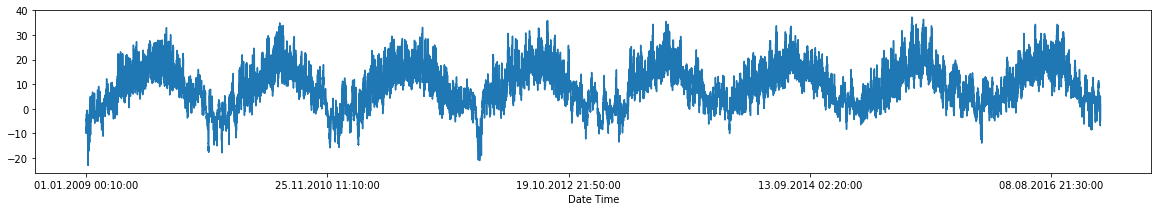

In [ ]:
weather_df['T (degC)'].plot(figsize=(20,3))

Clearly we observe a seasonal trend.





### The Analytical Problem

The true analytical questions is:


> Given the weathre data from the past $N$ timesteps (with each timestep as `10` minutes, as shown in the index of the DF), can you predict the temperature in the future $M$ timesteps?

To Analyze this question, we need to define a few things:
- $N$, aka. `lookback`, how many observations we would go back
  - Let's say `10` days, which means `240` hours or `14400` minutes, so `lookback = 1440` (steps)
- $M$, aka. `delay`, how many observations we need to predict forward
  - We need to predict `24` hours or `1440` minutes, so `delay = 144`.
- We also need to define the frequency of our sampling, aka. `steps`
  - Let's say we sample the data hourly, or every `60` minutes, so `steps = 6`

In [ ]:
lookback = 1440
steps = 6
delay = 144
#### we can also define batch_size here
batch_size = 128


### Preprocessing the Data

- Since the data is numerical, we do not need vectorization
- But we do need to standardize our data, such as a `z-score` transformation:
$$ z = \frac{x-\bar{x}}{\mu}$$
  - We should only use $\bar{x}$ and $\mu$ from the training data (say first `200000` observations)
  - This step is very important because it avoids the __leak into the future__ problem
- We also need to pass the data in a generator so that
  - sample batches of data within the range determined by `lookback`

In [ ]:
#### z-score transformatin
#### we can always use standardscaler from sklean
#### but it is so simple we can do it in numpy
mean = data[:200000].mean(axis=0)
data -= mean
std = data[:200000].std(axis=0)
data /= std

In [ ]:
#### generator function
import numpy as np

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    '''
    Generates batches of data with defined sampling.
    INPUT:
    ---
    - data (NumPy array): The original array of floating-point datanormalized.
    - lookback (int): How many timesteps back the input data should go.
    - delay (int): How many timesteps in the future the target should be.
    - min_index and max_index (int): Segment data into train, validation and testing
    - shuffle (bool): Whether to shuffle the samples or draw them in chronological order.
    - batch_size (int): The number of samples per batch.
    - step (int): The period, in timesteps, at which you sample data.
    OUTPUT:
    ---
    samples (NumPy array): train, validation, test samples containing features
    targets (NumPy array): train, validation, test targets.
    '''
    #### if we do not want to reserve data for validation
    #### only use `delay` data for testing
    if max_index is None:
        max_index = len(data) - delay - 1
    #### starting point: if `min_index` = 0 then we start at `lookback`
    #### since we want to make sure the every sample, including the first one
    #### contains `lookback` number of steps
    i = min_index + lookback
    while 1:
        #### random sampling
        if shuffle:
            rows = np.random.randint(i, max_index, size=batch_size)
        #### ordered sampleing
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [ ]:
#### geerating samples and targets
train_gen = generator(data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=steps,
                      batch_size=batch_size)
val_gen = generator(data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=220000,
                    step=steps,
                    batch_size=batch_size)
test_gen = generator(data,
                     lookback=lookback,
                     delay=delay,
                     min_index=220001,
                     max_index=None,
                     step=steps,
                     batch_size=batch_size)
#### How many steps to draw to see the validation set
# val_steps = (220000 - 200001 - lookback)
val_steps = 500
#### How many steps to draw to see the test set
# test_steps = (len(data) - 220001 - lookback)
test_steps = 500

Let's first create a MLP baseline. Since this is a regression problem we use `mae` as the loss function.

In [ ]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // steps, data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 11s 20ms/step - loss: 2.2140 - val_loss: 0.7767
Epoch 2/20
500/500 [==============================] - 10s 19ms/step - loss: 0.7497 - val_loss: 0.3436
Epoch 3/20
500/500 [==============================] - 10s 19ms/step - loss: 0.3664 - val_loss: 0.3321
Epoch 4/20
500/500 [==============================] - 10s 19ms/step - loss: 0.2842 - val_loss: 0.3082
Epoch 5/20
500/500 [==============================] - 9s 19ms/step - loss: 0.2605 - val_loss: 0.3703
Epoch 6/20
500/500 [==============================] - 10s 19ms/step - loss: 0.2508 - val_loss: 0.3295
Epoch 7/20
500/500 [==============================] - 10s 19ms/step - loss: 0.2429 - val_loss: 0.3277
Epoch 8/20
500/500 [==============================] - 10s 19ms/step - loss: 0.2366 - val_loss: 0.3538
Epoch 9/20
500/500 [==============================] - 10s 19ms/step - loss: 0.2313 - val_loss: 0.3219
Epoch 10/20
500/500 [==============================] - 10s 19ms/step - loss: 0.2272

You can see the model reach the best `val_loss` (`mae`) of `0.3263` at epoch `5`.

Since the model overfitted easily (with is common in time series analysis or regression models), we consider using a `EarlyStopping` below (See L4 for more details).

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

So we can build out first recurrent baseline, with a `GRU` layer.

In [ ]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps,
                              callbacks=[es]
                    )

Epoch 1/20
500/500 [==============================] - 18s 26ms/step - loss: 0.3184 - val_loss: 0.2453
Epoch 2/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2853 - val_loss: 0.2464
Epoch 3/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2762 - val_loss: 0.2443
Epoch 4/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2746 - val_loss: 0.2406
Epoch 5/20
500/500 [==============================] - 14s 27ms/step - loss: 0.2671 - val_loss: 0.2531
Epoch 6/20
500/500 [==============================] - 14s 27ms/step - loss: 0.2629 - val_loss: 0.2504
Epoch 7/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2578 - val_loss: 0.2406
Epoch 8/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2545 - val_loss: 0.2462
Epoch 9/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2502 - val_loss: 0.2566
Epoch 00009: early stopping


Albeit the better results, we can see we still have serious __overfitting__ problem.

From L4 we know another way to fight the overfitting problem is to use `Dropout`. In RNN models, we can use recurrent dropout within the RNN layer, rather than using a separate `Dropout` layer.

See example below.

In [ ]:
#### takes time to run !!!
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2, # general dropouts
                     recurrent_dropout=0.2, # dropouts applied to every step
                     input_shape=(None, data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps,
                              callbacks=[es])

Epoch 1/40
500/500 [==============================] - 359s 703ms/step - loss: 0.3504 - val_loss: 0.2627
Epoch 2/40
500/500 [==============================] - 348s 696ms/step - loss: 0.3052 - val_loss: 0.2596
Epoch 3/40
500/500 [==============================] - 347s 694ms/step - loss: 0.3009 - val_loss: 0.2593
Epoch 4/40
500/500 [==============================] - 348s 697ms/step - loss: 0.2959 - val_loss: 0.2482
Epoch 5/40
500/500 [==============================] - 345s 691ms/step - loss: 0.2928 - val_loss: 0.2578
Epoch 6/40
500/500 [==============================] - 346s 693ms/step - loss: 0.2864 - val_loss: 0.2612
Epoch 7/40
500/500 [==============================] - 347s 695ms/step - loss: 0.2818 - val_loss: 0.2584
Epoch 8/40
500/500 [==============================] - 347s 694ms/step - loss: 0.2784 - val_loss: 0.2496
Epoch 9/40
362/500 [====================>.........] - ETA: 1:28 - loss: 0.2757

KeyboardInterrupt: ignored

You see the warning above? That's because the version of Nvidia's cuDNN does not support `recurrent_dropout`. You can always install a newer version, hopefull that would solve the problem - to increase the training time.

### Stacked Recurrent Layers

- With using `Dropout` to handle the overfitting issue, we can actually make our model(s) more complex, in search for __better performance__
- Increasing the model complexity (e.g., number of layers or number of neurons in each layer), aka. capacity, can let the model capture more complex patterns, or deeper

__PRO TIP__: however, increasing model capacity cannot guarantee better performance.

- Usually the powerful RNN models using multiple RNN layers
  - This is very straigtforward, you just stack these layers one after another
  - One key features is you have to use `return_sequences` to connect the _output_ from the previous RNN layer to the _input_ of the subsequent layer
- See below illustrative example to understand how `return_sequences` works.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
import numpy as np
#### Note that we use the Functional API here `Model`
#### define model
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
#### define input data
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))
#### make and show prediction
model.predict(data)

array([[0.03304904]], dtype=float32)

You can see the output of the LSTM layer, without `return_sequences`, is an $n$-d vector, where the shape of the input data is ($n , m$). In other words, LSTM "squeezes" the input data.

However, to stack RNN (e.g., LSTM) layers together, we need to make sure the output of the previous layer is the same of the input data (i.e., ($n , m$)). That's why we use `return_sequences`.

In [ ]:
#### define model
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1, return_sequences=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
#### define input data
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))
#### make and show prediction
model.predict(data)

array([[[-0.0141936 ],
        [-0.03891549],
        [-0.07043877]]], dtype=float32)

See the shape of the output is `(1, 3)`, as the same as the input data?

Now Let's use stacked `GRU` layers on our temperature forecasting problem.

Below code shows how it's done"

```python
model = Sequential()
model.add(GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, data.shape[-1])))
#### stacked GRU here
model.add(GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen,
                    steps_per_epoch=500,
                    epochs=40,
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    callbacks = [es])
```

Refer to Figure 6.23 in your textbook for the results.

We can see that the more complex model (stacked RNN) yield slightly better results. Actually, you should understand a lot of the pre-trained models, like the `VGG-16` model we saw, or the [transformer models](https://www.analyticsvidhya.com/blog/2019/06/understanding-transformers-nlp-state-of-the-art-models/) we used in NLP, have multiple stacked layers for better performance.

### Bidirectional RNNs

- To further improve the performance of the RNNs, we use a special technique called __bidirectional RNN__
  - Which captures the sequence from both directions (e.g., from both left-right and right-left)
  - This is because of the dependency are usually bidirectional, say the words before and after determine the word in between
- Traditional RNNs are __order dependent__
  - They process the sequence in order, you cannot shift, reverse, or shuffle the order: since the sequence becomes are different data
  - The order is meaningful - means order is part of the __pattern__
- In a lot of the cases, such as the weather forecasting problem, the reversed order does not make a lot of sense (refer to Figure 6.24 for the results)
  - But in other scenarios, such as NLP, we use bidirectional RNNs a lot (refer to listing 6.42 for an example)

__PRO TIP:__ You should consider using bidirectional RNN when you are analyzing text data. Additionally, if you can find a representation of the data, you should always use it.

- Let's see whether a Bidirectional GRU model can help us forecasting the temperature
  - Refer to the textbook for a NLP example on the IMDB data

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
#### Bidirectional is a wrapper that can be applied to any RNN layer
model.add(layers.Bidirectional(
    layers.GRU(32), input_shape=(None, data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 21s 35ms/step - loss: 0.2915 - val_loss: 0.2550
Epoch 2/40
500/500 [==============================] - 17s 35ms/step - loss: 0.2729 - val_loss: 0.2403
Epoch 3/40
500/500 [==============================] - 17s 35ms/step - loss: 0.2662 - val_loss: 0.2406
Epoch 4/40
500/500 [==============================] - 17s 35ms/step - loss: 0.2614 - val_loss: 0.2395
Epoch 5/40
500/500 [==============================] - 17s 34ms/step - loss: 0.2557 - val_loss: 0.2346
Epoch 6/40
500/500 [==============================] - 17s 35ms/step - loss: 0.2509 - val_loss: 0.2637
Epoch 7/40
500/500 [==============================] - 17s 35ms/step - loss: 0.2427 - val_loss: 0.2550
Epoch 8/40
500/500 [==============================] - 18s 35ms/step - loss: 0.2392 - val_loss: 0.2628
Epoch 9/40
500/500 [==============================] - 18s 35ms/step - loss: 0.2300 - val_loss: 0.2695
Epoch 10/40
500/500 [==============================] - 18s 35ms/step - loss: 0.224

We confirm that the bidirectional GRU does not improve the performance a lot.

### YOUR TURN HERE

Build your model on the IMDB dataset, with considerations of the following points:
- Adjust the number of units in each recurrent layer in the stacked setup. The current choices are largely arbitrary and thus probably suboptimal.
- Adjust the learning rate used by the `RMSprop` optimizer.
- Try using `LSTM` layers instead of `GRU` layers.
- Try using a bigger densely connected regressor on top of the recurrent layers: that is, a bigger `Dense` layer or even a stack of `Dense` layers.
- Don’t forget to eventually run the best-performing models (in terms of `val_loss`) on the test set!

In [ ]:
#### Write your code here


## Use 1D CNN on Sequence Data

- In L5, we saw how to use 2D CNN to extract 2D patches of images (as representations of them) for classification purposes
- Similarly, we can use 1D CNN to create 1D patches of sequence data
  - these 1D patches are __subsequences__
  - the subsequences can capture the local dependencies (patterns) in the sequence data
- For instance, if we create 1D patches with size of 5 on text data at the __character level__:
  - these patches are words or words fragments of length 5 or less
  - so we can learn word morphs using this network
- See the illustration below:

![1DCNN](https://drek4537l1klr.cloudfront.net/chollet/Figures/06fig26.jpg)

### `Conv1D` Layers

- `Conv1D` layers are similar to the `Conv2D` layers
  - they take inputs in the shape of `(samples, time, features)`
  - Key difference compared to the `Conv2D` layers:
    - `samples` are number of sequences in the training set
    - `time` means steps in the sequences, such as number of words/characters
    - `features` refer to the embedding of words/characters
- Similar to `Conv2D` layers, every `Conv1D` layer needs to be paired up with a `MaxPooling1D` layer
  - we say we use $ 3\times 3$ or $5 \times 5$ filters in `Conv2D` layers, but we use `7` or `9` filters for `Conv1D` layers
  - Just note after the __last__ `Conv1D` layer we need to use the `GlobalMaxPooling1D` layer so the data is flatten
- Let's use a `Conv1D` model on the IMDB dataset here.

In [ ]:
#### load and prepare the data
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [ ]:
#### Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [ ]:
#### compile and train
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
157/157 [==============================] - 33s 38ms/step - loss: 0.7686 - acc: 0.5170 - val_loss: 0.6856 - val_acc: 0.5576
Epoch 2/10
157/157 [==============================] - 6s 35ms/step - loss: 0.6676 - acc: 0.6596 - val_loss: 0.6687 - val_acc: 0.6474
Epoch 3/10
157/157 [==============================] - 6s 35ms/step - loss: 0.6310 - acc: 0.7539 - val_loss: 0.6350 - val_acc: 0.6534
Epoch 4/10
157/157 [==============================] - 6s 36ms/step - loss: 0.5568 - acc: 0.8022 - val_loss: 0.5253 - val_acc: 0.7848
Epoch 5/10
157/157 [==============================] - 6s 36ms/step - loss: 0.4313 - acc: 0.8397 - val_loss: 0.4351 - val_acc: 0.8324
Epoch 6/10
157/157 [==============================] - 6s 36ms/step - loss: 0.3509 - acc: 0.8716 - val_loss: 0.4158 - val_acc: 0.8512
Epoch 7/10
157/157 [==============================] - 6s 35ms/step - loss: 0.3062 - acc: 0.8913 - val_loss: 0.4104 - val_acc: 0.8580
Epoch 8/10
157/157 [==============================] - 6s 35ms/step -

### Combining `CNN` with `LSTM` Layers

- Since `1DCNN` captures the __patterns__ within the subsequences
  - they do not capture the dependencies between the subsequences
- One solution is to stack a lot of `CNN` layers together
  - but that would subject your model(s) to overfitting
  - and the model can only capture the __weak__ dependencies between the subsequences
- Refer to Listing 6.47 and Figure 6.29 on the textbook for an example of using `1DCNN` on the weather forecasting data
  - The results are fairly inferior since the model cannot capture the temporal relationships in the data
  - In the IMDB sentiment classification problem, since the sentiment signals are at the word level, the problem is not as severe
- The solution is to combine the `1DCNN` with `RNN` layers, see below:

![CNNLSTM](https://drek4537l1klr.cloudfront.net/chollet/Figures/06fig30.jpg)

Even though this architecture is not as popular as pure CNN or LSTM, it is gaining more attractions recently.

Let's illustrate it using the weather forecasting problem. One key difference is that since the CNN-LSTM model allows us to investigate longer dependencies in our data, we can either have more `lookback` data, or predict with a finer-grained data (aiming for more precision).

For the purpose of illustration, we try to predict 10-days with 30 minutes intervals (rather than 1 hour used above). We need to re-design our data generators.

In [ ]:
#### data generators - very similar compared to before
step = 3
lookback = 720
delay = 144

train_gen = generator(data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)
val_gen = generator(data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=220000,
                    step=step)
test_gen = generator(data,
                     lookback=lookback,
                     delay=delay,
                     min_index=220001,
                     max_index=None,
                     step=step)
#### we let the model process 128 steps at a time
#### speed up the process, while the loss in performance
#### can be compensated with the advanced model
val_steps = (220000 - 200001 - lookback) // 128
test_steps = (len(data) - 220001 - lookback) // 128

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Conv1D(32, 5, activation='relu',
                        input_shape=(None, data.shape[-1])))
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 5, activation='relu'))
#### note that we do not need `MaxPooling` here
model.add(GRU(32))
model.add(Dense(1))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, None, 32)          192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_4 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 11,713
Trainable params: 11,713
Non-trainable params: 0
_________________________________________________________________


Below is how you train and validate the model:

```python
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen,
                    steps_per_epoch=500,
                    epochs=20,
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    callbacks=[es])
```

Judging from the validation loss, this setup isn’t as good as the regularized GRU alone, but it’s significantly faster. It looks at twice as much data, which in this case doesn’t appear to be hugely helpful but may be important for other datasets.

# Deep Learning & Artificial Intelligence
## Recurrent Neural Networks and Natrural Language Processing
### Dr. Jie Tao, Fairfield University